In [1]:
# =============================================================================
# TODO: remove this section when the package is published on PyPI
# =============================================================================
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))
# =============================================================================

from flightpandas import FlightCollection
from flightpandas.splitter import TimeGapSplitter
from flightpandas.simplifier import RDP
import pandas as pd


In [2]:
# Load the data
df = pd.read_parquet('data/rksi_state_vectors.parquet')

# Create a Flight instance
fc = FlightCollection(df, keys=['icao24', 'callsign'])
fc.data.set_index('time', inplace=True)
fc.data.index = pd.to_datetime(fc.data.index, unit='s')
fc = TimeGapSplitter(fc, '1h').eval()
fc

Found latitude column: lat
Found longitude column: lon
Found altitude column: baroaltitude
Found altitude_rate column: vertrate
Found velocity column: velocity
Found heading column: heading


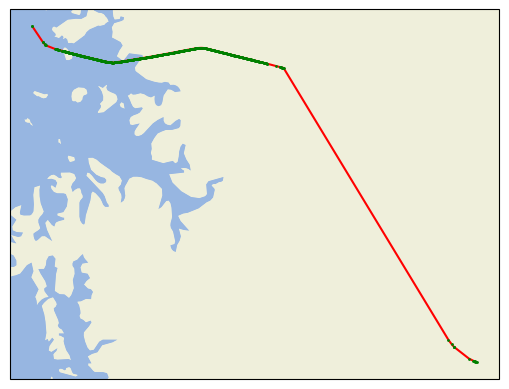

In [3]:
flight = fc.flights[1]

ax = flight.plot(color='red', zorder=0)
ax = flight.scatter(ax=ax, color='green', zorder=1)

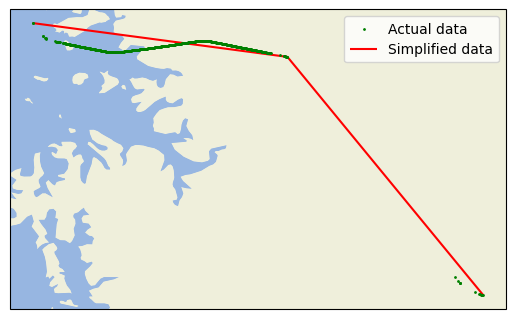

In [4]:
simplified = RDP(flight, tolerance=0.1).eval()
ax = flight.scatter(color='green', zorder=1, label='Actual data')
ax = simplified.plot(ax=ax, color='red', zorder=0, label='Simplified data')
ax.legend()

Found latitude column: lat
Found longitude column: lon
Found altitude column: baroaltitude
Found altitude_rate column: vertrate
Found velocity column: velocity
Found heading column: heading


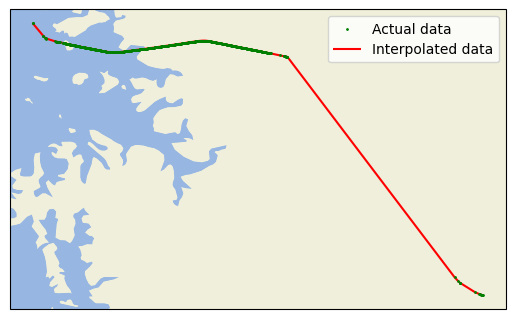

In [5]:
interpolated = flight.resample('1s', method='linear')
ax = flight.scatter(color='green', zorder=1, label='Actual data')
ax = interpolated.plot(ax=ax, color='red', label='Interpolated data', zorder=0)
ax.legend()